Import necessary packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score

Load the dataset

In [10]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Data cleaning and preprocessing

In [12]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [16]:
cust_df = df[["gender", "SeniorCitizen", "Dependents", "tenure", 
              "MultipleLines", "InternetService", "TotalCharges", "Churn"]]
cust_df.head()

,gender,SeniorCitizen,Dependents,tenure,MultipleLines,InternetService,TotalCharges,Churn
0,Female,0,No,1,No phone service,DSL,29.85,No
1,Male,0,No,34,No,DSL,1889.50,No
2,Male,0,No,2,No,DSL,108.15,Yes
3,Male,0,No,45,No phone service,DSL,1840.75,No
4,Female,0,No,2,No,Fiber optic,151.65,Yes


In [17]:
cust_df["Churn"] = cust_df["Churn"].map({"Yes": 1, "No": 0})
cust_df["gender"] = cust_df["gender"].map({"Female": 1, "Male": 0})
cust_df["Dependents"] = cust_df["Dependents"].map({"Yes": 1, "No": 0})
cust_df["MultipleLines"] = cust_df["MultipleLines"].map({"Yes": 1, "No": 0, "No phone service": 2})
cust_df["InternetService"] = cust_df["InternetService"].map({"DSL": 1, "No": 0, "Fiber optic": 2})

/var/folders/67/w34t7wgn6_s13hb551pyr9vc0000gn/T/ipykernel_43205/1038181729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_df["Churn"] = cust_df["Churn"].map({"Yes": 1, "No": 0})
/var/folders/67/w34t7wgn6_s13hb551pyr9vc0000gn/T/ipykernel_43205/1038181729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_df["gender"] = cust_df["gender"].map({"Female": 1, "Male": 0})
/var/folders/67/w34t7wgn6_s13hb551pyr9vc0000gn/T/ipykernel_43205/1038181729.py:3: SettingWithCopyWarning: 
A value is trying to

In [19]:
cust_df.head()
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           7032 non-null   int64  
 1   SeniorCitizen    7032 non-null   int64  
 2   Dependents       7032 non-null   int64  
 3   tenure           7032 non-null   int64  
 4   MultipleLines    7032 non-null   int64  
 5   InternetService  7032 non-null   int64  
 6   TotalCharges     7032 non-null   float64
 7   Churn            7032 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 494.4 KB


array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'Dependents'}>],
       [<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'MultipleLines'}>,
        <AxesSubplot:title={'center':'InternetService'}>],
       [<AxesSubplot:title={'center':'TotalCharges'}>,
        <AxesSubplot:title={'center':'Churn'}>, <AxesSubplot:>]],
      dtype=object)

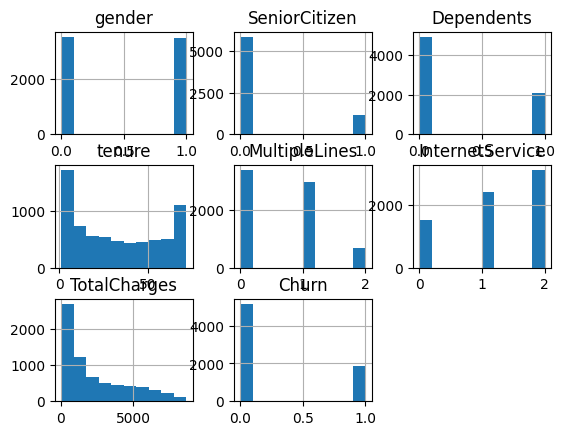

In [20]:
cust_df.hist()

In [24]:
X = cust_df.drop(["Churn"], axis=1)
X_reg = cust_df.drop(["TotalCharges"], axis=1)
y = cust_df["Churn"]
y_reg = cust_df["TotalCharges"]

In [25]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = lin_reg.predict(X_test_reg)

print("Linear Regression MSE:", mean_squared_error(y_test_reg, y_pred_reg))
print("Linear Regression R² Score:", r2_score(y_test_reg, y_pred_reg))

Linear Regression MSE: 775540.0589265823
Linear Regression R² Score: 0.8499212237555485


In [27]:
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train_class)
y_pred_class = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test_class, y_pred_class))
print(classification_report(y_test_class, y_pred_class))

Logistic Regression Accuracy: 0.7889125799573561
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.47      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



In [34]:
dt = DecisionTreeClassifier(max_depth=2)
rf = RandomForestClassifier(max_depth=2, n_estimators=100, min_samples_leaf=6)

dt.fit(X_train, y_train_class)
rf.fit(X_train, y_train_class)

y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test_class, y_pred_dt))
print("Random Forest Accuracy:", accuracy_score(y_test_class, y_pred_rf))

Decision Tree Accuracy: 0.7874911158493249
Random Forest Accuracy: 0.767590618336887
